Ordinary Differential Equations
===============================================

## Part 1

### Suggestion

Run the code cell below before the others to make sure that the figures render well.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20

## Exponential Decay
Let us look at a simple example of solving an ordinary differential equation using numerical methods.

Use the $rk23$ (Second order Runge-Kutta) method and plot a solution $x(t)$ for exponential decay, described by the differential equations

\begin{equation}
\frac{dy}{dt} = -y.
\end{equation}

The code cell below has code that uses 'solve_ivp' routine in the 'scipy.integrate' module to solve the dynamics from $x=1$ at $t=0$. 

In [5]:
import numpy as np

# Import the 'solve_ivp' function from the 'scipy.integrate' module.
from scipy.integrate import solve_ivp

# First, write a function for calculating the RHS of the ODE, which is simply -x
def rhs_function(t, y):
    dydt = -y
    return dydt

# Then, set the initial condition. This MUST be an iterable, even if it is only one number
y_init = [1.0]

# Set an array of t-values where the solution will be evaluated
t_final = 3
times = np.linspace(0.0, t_final, 10)

# Now, call the 'solve_ivp' function with the following arguments in this order:
#  1. Name of the RHS function
#  2. A tuple containing initial and final times
#  3. The initial condition, 
#  4. The array of t-values

soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times)

# Print the result
soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.333e-01  6.667e-01  1.000e+00  1.333e+00
             1.667e+00  2.000e+00  2.333e+00  2.667e+00  3.000e+00]
        y: [[ 1.000e+00  7.162e-01  5.131e-01  3.681e-01  2.637e-01
              1.890e-01  1.355e-01  9.704e-02  6.958e-02  4.987e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

As you can see, the solution is a python object assigned a variable named 'soln'. This contains solution data, as well as some other numerical information. You can recover the data using object methods. 

In [18]:
#This shows that the numerical method was successful
soln.success

True

The times and y-values obtained numerically can be obtained as follows

In [19]:
soln.t

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

In [20]:
soln.y[0]

array([1.        , 0.71621666, 0.51310341, 0.36814005, 0.26367376,
       0.18898503, 0.13548843, 0.09703629, 0.06958482, 0.04987137])

Now, let us plot the solution data and compare with the analytical solution $y = e^{-t}.$

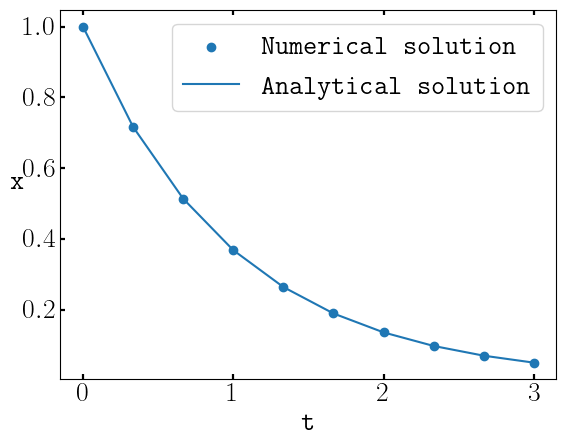

In [21]:
import matplotlib.pyplot as plt

plt.xlabel('t')
plt.ylabel('x', rotation=0)

plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

The numerical solution appears to match the analytical solution exactly!!! 

However, there are errors, although they are too small to see here. The solver keeps the local error estimates below a **default tolerance**. 
1. The relative tolerance, given by the internal variable `rtol` is set to $10^{-3}$, and 
2. The absolute tolerance, given by the internal variable `atol`, is set to =$10^{-6}$. 
   
The algorithm does extra computations to ensure that the estimated absolute and relative errors are below these tolerances. 

What if we increased them by supplying keyword arguments, thereby reducing the accuracy?

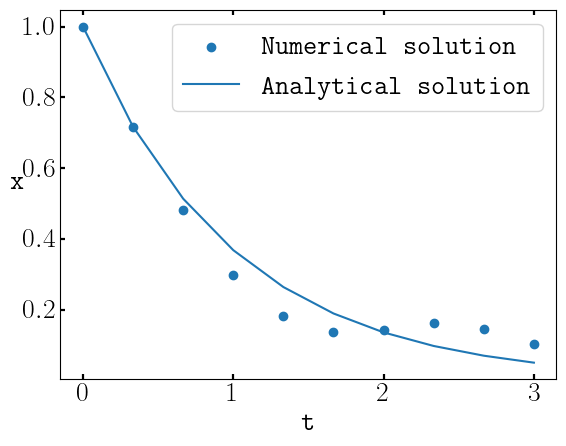

In [23]:
import matplotlib.pyplot as plt

#Note the additional keyword arguments 'rtol' and 'atol' which set the relative and absolute tolerances.
soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times, rtol=0.1, atol=0.1)

plt.xlabel('t')
plt.ylabel('x', rotation=0)
plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

By default, the `solve_ivp` routine uses the standard '$4^{th}$ Order Runge-Kutta Method' to numerically compute solutions to ODEs. The error is estimated by doing each calculation to a higher order ($5^{th}$). Hence, the method is called by the string `RK45`.


There are other methods available, such as the well-known and widely-used `LSODA` algorithm devised at the Lawrence Livermore National Laboratory in the USA by Petzold and Hindmarsh. This algorithm is slower, but more precise.

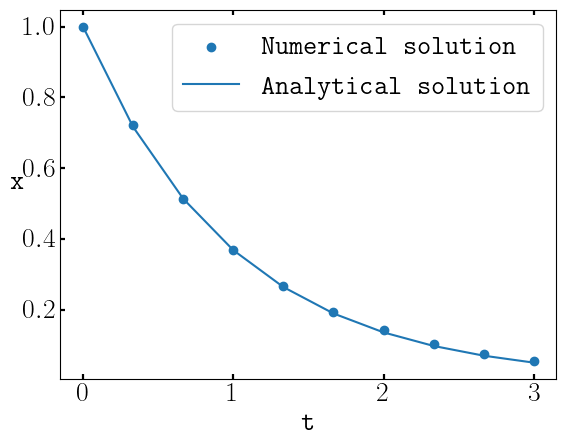

In [25]:
import matplotlib.pyplot as plt

#Note the additional keyword argument 'method' which sets the method to 'LSODA'.
soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times, rtol=0.1, atol=0.1, method='LSODA')

plt.xlabel('t')
plt.ylabel('x', rotation=0)
plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

As you can see, the `LSODA` algorithm yields more accurate results with the same error tolerances than the `RK45` method, although `RK45` is the default choice due to its speed.

### Exercise 01:

A spin-$1/2$ particle undergoes quantum precession under a magnetic field in the $x-$direction. Simulate this using the `solve_ivp` function. The Hamiltonian is given by 
\begin{equation*}
H = -\frac12 \sigma_x.
\end{equation*}
and the system obeys the Schrodinger Equation given by 

\begin{equation*}
H\ket{\psi} = i  \frac{\partial}{\partial t} \ket{\psi},
\end{equation*}

where $\ket{\psi}$ is a 2-dimensional spinor. Start the state from an eigenstate of $\sigma_z$ like $[1,0]$

The main difference between this and the previous case is that the differential equation has two dependent variables. It can be written from the Schrodinger equation as follows: If $\ket{\psi} = \left(y_0, y_1\right)$, then 

\begin{align*}
\frac{\partial}{\partial t} \ket{\psi} &= -i H\ket{\psi} \\
\implies  \frac{d}{dt}\begin{pmatrix}
                        y_0\\
                        y_1
                        \end{pmatrix}  &=  \frac{i}{2}\begin{pmatrix}
                                 0 & 1\\
                                 1 & 0 
                                \end{pmatrix}\cdot \begin{pmatrix}
                                                y_0\\
                                                y_1
                                                \end{pmatrix}
\end{align*}

Just like before, this is a first order differential equation, only instead of a single variable `y`, we have an array of two values `[y0, y1]`, and the RHS is a matrix-vector operation. Since we already know how to do this in NumPy, we can easily construct the rhs function for this problem now.

In [3]:
import numpy as np

# Import the 'solve_ivp' function from the 'scipy.integrate' module.
from scipy.integrate import solve_ivp

sx = np.array([[0., 1.],
                [1., 0.]], dtype=np.complex128)

# First, write a function for calculating the RHS of the ODE, which is simply -x
def rhs_spin(t, y):
    dydt = 1j * sx @ y
    return dydt

Now, complete the simulation exercise in the code cell below. Note that the initial condition should also be a NumPy array.

In [89]:
from scipy.integrate import solve_ivp

# Then, set the initial condition. This MUST be an iterable, even if it is only one number
y_init = np.array([1.0, -1.0], dtype=np.complex128)/np.sqrt(2)

# Set an array of t-values where the solution will be evaluated
t_final = 2 * 2 * np.pi
times = np.linspace(0.0, t_final, 1000)

# Now, call the 'solve_ivp' function with the following arguments in this order:
#  1. Name of the RHS function
#  2. A tuple containing initial and final times
#  3. The initial condition, 
#  4. The array of t-values

soln = solve_ivp(rhs_spin, (0, t_final), y_init, t_eval=times)
soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.258e-02 ...  1.255e+01  1.257e+01]
        y: [[ 0.70710678+0.j          0.70705084-0.00889443j ...
              0.70688888+0.00674675j  0.70691781-0.00214547j]
            [-0.70710678+0.j         -0.70705084+0.00889443j ...
             -0.70688888-0.00674675j -0.70691781+0.00214547j]]
      sol: None
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0

If the solution has evaluated successfully, then plot the expectation value of the $x-$ component of the spin, given by
\begin{equation*}
\left\langle S_x\right\rangle = -\frac12 \left\langle \psi\left\vert \sigma_x\right\vert \psi \right\rangle =  - \frac12  \begin{pmatrix}
                                                y^\ast_0 & y^\ast_1
                                                \end{pmatrix}\cdot \begin{pmatrix}
                                 0 & 1\\
                                 1 & 0 
                                \end{pmatrix}\cdot \begin{pmatrix}
                                                y_0\\
                                                y_1
                                                \end{pmatrix},
\end{equation*}  
as a function of time.

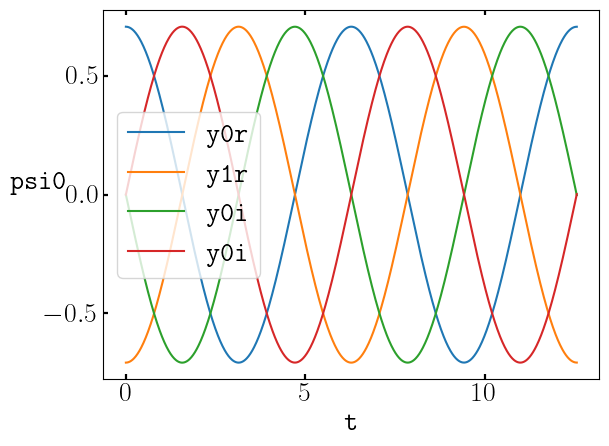

In [93]:
import matplotlib.pyplot as plt


plt.xlabel('t')
plt.ylabel('psi0', rotation=0)

y0 = soln.y[0]
y1 = soln.y[1]

sx_t = y0.conj() * y1 


plt.plot(times, y0.real, label='y0r')  
plt.plot(times, y1.real, label='y1r')  
plt.plot(times, y0.imag, label='y0i')  
plt.plot(times, y1.imag, label='y0i')  


plt.legend()

In [83]:
soln.y[1]

array([-7.07106781e-01+0.j        , -7.06787970e-01+0.02123125j,
       -7.05831823e-01+0.04244335j, -7.04239203e-01+0.06361718j,
       -7.02012670e-01+0.08473524j, -6.99157503e-01+0.10578272j,
       -6.95675807e-01+0.12673927j, -6.91569974e-01+0.14758445j,
       -6.86842971e-01+0.16829814j, -6.81498342e-01+0.18886059j,
       -6.75540207e-01+0.20925238j, -6.68973261e-01+0.22945443j,
       -6.61802776e-01+0.24944802j, -6.54034597e-01+0.26921475j,
       -6.45675149e-01+0.28873659j, -6.36731430e-01+0.30799581j,
       -6.27211015e-01+0.32697507j, -6.17122054e-01+0.34565734j,
       -6.06473273e-01+0.36402595j, -5.95273974e-01+0.38206456j,
       -5.83534036e-01+0.39975719j, -5.71263912e-01+0.41708818j,
       -5.58474632e-01+0.43404223j, -5.45177802e-01+0.45060438j,
       -5.31385602e-01+0.46676j   , -5.17110791e-01+0.48249482j,
       -5.02366701e-01+0.4977949j , -4.87167241e-01+0.51264666j,
       -4.71526896e-01+0.52703683j, -4.55460726e-01+0.54095252j,
       -4.38984369e-01+0.